In [6]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

# Results Analysis
* ...

In [8]:
def load_plot(page, plot_y_org=True):
    forecast = pd.read_feather(PROPHET_PATH+VERSION+page+'df.f')
    wiki.newphet.prophet_plot(forecast, plot_y_org=plot_y_org)
    plt.show()

In [9]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'
VERSION = 'v7y/'

In [10]:
forecasts = glob.glob(PROPHET_PATH+VERSION+'*df.f')

In [23]:
forecasts[:100]

['../data/prophet/v7y/88262df.f',
 '../data/prophet/v7y/38562df.f',
 '../data/prophet/v7y/139999df.f',
 '../data/prophet/v7y/60766df.f',
 '../data/prophet/v7y/118758df.f',
 '../data/prophet/v7y/12336df.f',
 '../data/prophet/v7y/59883df.f',
 '../data/prophet/v7y/41791df.f',
 '../data/prophet/v7y/2479df.f',
 '../data/prophet/v7y/103595df.f',
 '../data/prophet/v7y/132011df.f',
 '../data/prophet/v7y/44157df.f',
 '../data/prophet/v7y/8636df.f',
 '../data/prophet/v7y/3334df.f',
 '../data/prophet/v7y/20941df.f',
 '../data/prophet/v7y/79956df.f',
 '../data/prophet/v7y/14771df.f',
 '../data/prophet/v7y/57970df.f',
 '../data/prophet/v7y/12354df.f',
 '../data/prophet/v7y/24370df.f',
 '../data/prophet/v7y/58955df.f',
 '../data/prophet/v7y/112775df.f',
 '../data/prophet/v7y/91999df.f',
 '../data/prophet/v7y/92733df.f',
 '../data/prophet/v7y/11156df.f',
 '../data/prophet/v7y/63740df.f',
 '../data/prophet/v7y/74910df.f',
 '../data/prophet/v7y/59446df.f',
 '../data/prophet/v7y/83155df.f',
 '../data/pr

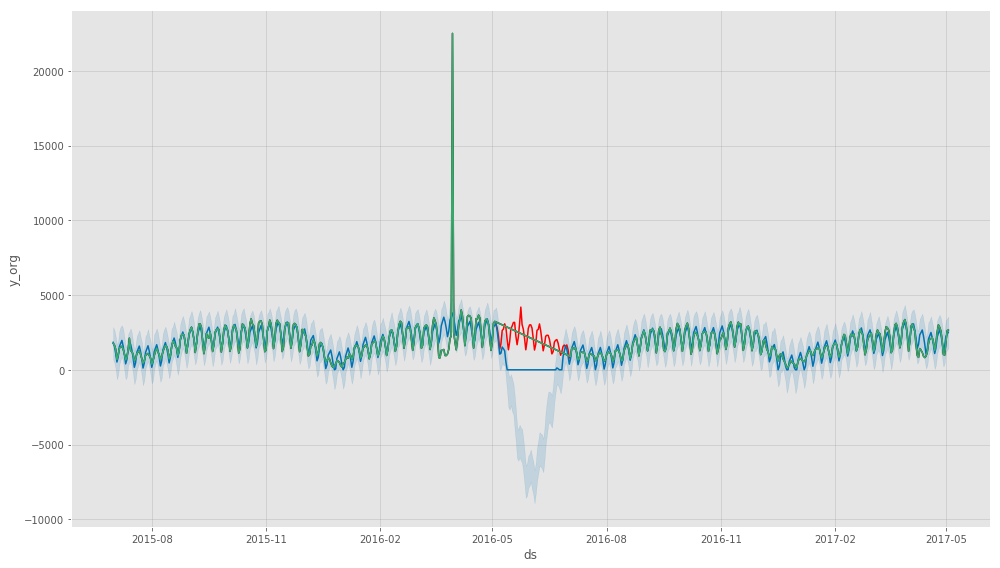

In [57]:
tpage = str(92733)
load_plot(tpage)

In [58]:
tforecast = pd.read_feather(PROPHET_PATH+VERSION+tpage+'df.f')
with open(PROPHET_PATH+VERSION+tpage+'m.pk', 'rb') as file:
    tm = pk.load(file)

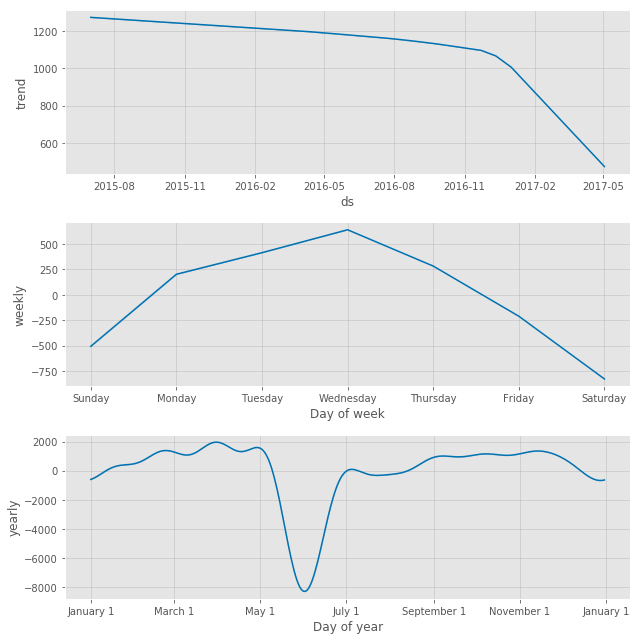

In [59]:
tm.plot_components(tforecast);

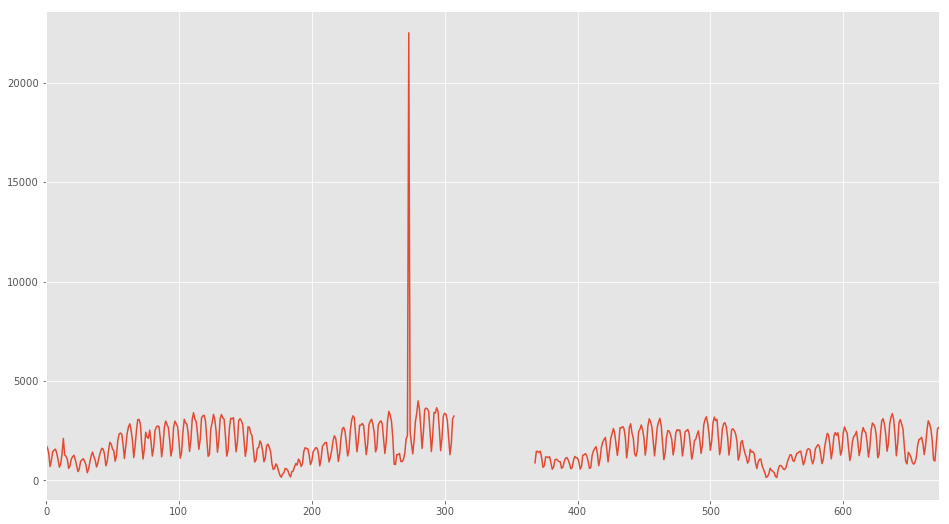

In [60]:
tforecast.y.plot()

In [36]:
tforecast.shape

(673, 21)

In [61]:
train_df = tforecast[['ds','y_org']]

In [62]:
train_df['y'] = train_df.y_org

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
train_df.y.iloc[520-673:580-673] = np.nan

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 3 columns):
ds       673 non-null datetime64[ns]
y_org    673 non-null float64
y        673 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 15.9 KB


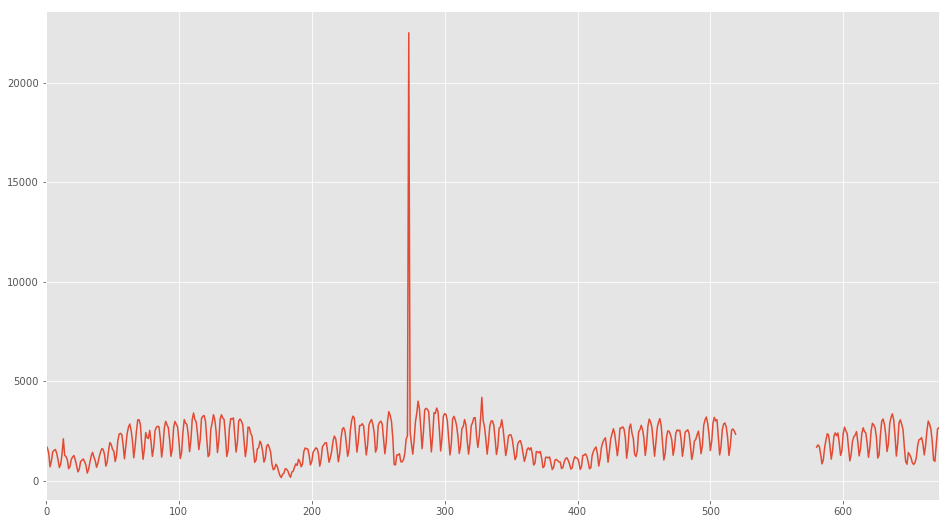

In [66]:
train_df.y.plot()

In [67]:
len(train_df.y.iloc[520-673:580-673])

60

In [69]:
train_df.y.iloc[520-673:580-673].count()

0

In [70]:
test_model = Prophet(yearly_seasonality=True)
test_model.fit(train_df)

In [75]:
newf = test_model.predict(train_df[['ds']])

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/fbprophet/forecaster.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ds'] = pd.to_datetime(df['ds'])


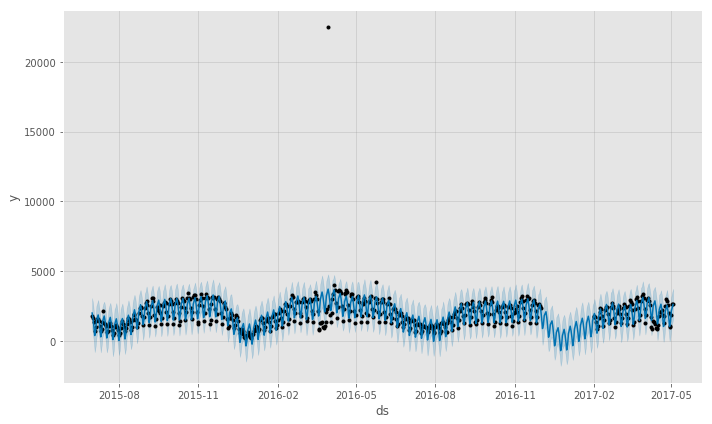

In [80]:
test_model.plot(newf);

In [78]:
utils.prevYear_shift((-120,-60))

(-485, -425)

In [79]:
utils.prevYear_shift(utils.prevYear_shift((-120,-60)))

(-850, -790)

In [85]:
len(train_df)

673

In [95]:
train_df['day_month_twice'] = 0

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
train_df.ds.apply(lambda x: (x.day,x.month)).value_counts()

(10, 2)     2
(19, 7)     2
(21, 8)     2
(26, 8)     2
(22, 7)     2
(2, 2)      2
(1, 10)     2
(22, 10)    2
(4, 1)      2
(10, 9)     2
(9, 7)      2
(6, 4)      2
(30, 1)     2
(29, 7)     2
(2, 4)      2
(10, 4)     2
(7, 1)      2
(6, 11)     2
(12, 7)     2
(17, 11)    2
(13, 3)     2
(3, 11)     2
(16, 10)    2
(8, 8)      2
(8, 9)      2
(23, 3)     2
(22, 9)     2
(4, 12)     2
(28, 1)     2
(2, 12)     2
           ..
(31, 5)     1
(26, 6)     1
(7, 6)      1
(7, 5)      1
(28, 6)     1
(29, 6)     1
(11, 5)     1
(5, 6)      1
(15, 5)     1
(26, 5)     1
(20, 6)     1
(27, 6)     1
(22, 5)     1
(18, 6)     1
(10, 5)     1
(23, 6)     1
(20, 5)     1
(8, 6)      1
(16, 5)     1
(27, 5)     1
(19, 6)     1
(23, 5)     1
(3, 6)      1
(4, 6)      1
(4, 5)      1
(12, 5)     1
(6, 5)      1
(29, 2)     1
(12, 6)     1
(16, 6)     1
Name: ds, Length: 366, dtype: int64

In [98]:
train_df = tforecast[['ds','y_org']]

In [99]:
train_df['y'] = train_df.y_org

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
year_lims = utils.prevYear_shift((-60,None))

In [101]:
year_lims

(-425, -365)

In [102]:
train_df.y.iloc[year_lims[0]:year_lims[1]] = np.nan

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
len(train_df.y.iloc[year_lims[0]:year_lims[1]])

60

In [106]:
train_df.y.iloc[year_lims[0]:year_lims[1]].count()

0

In [107]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 3 columns):
ds       673 non-null datetime64[ns]
y_org    673 non-null float64
y        613 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 15.9 KB


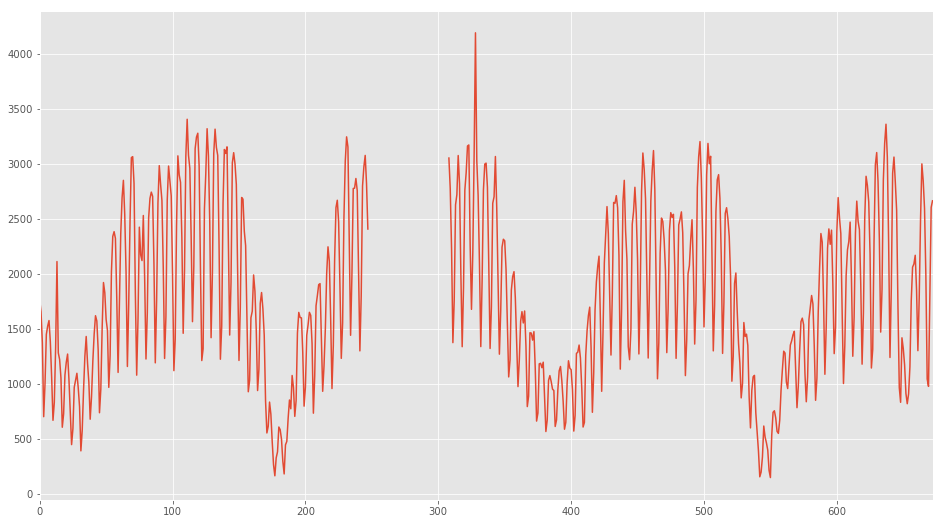

In [108]:
train_df.y.plot()

In [109]:
test_model = Prophet(yearly_seasonality=True)
test_model.fit(train_df)

In [110]:
newf = test_model.predict(train_df[['ds']])

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/fbprophet/forecaster.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ds'] = pd.to_datetime(df['ds'])


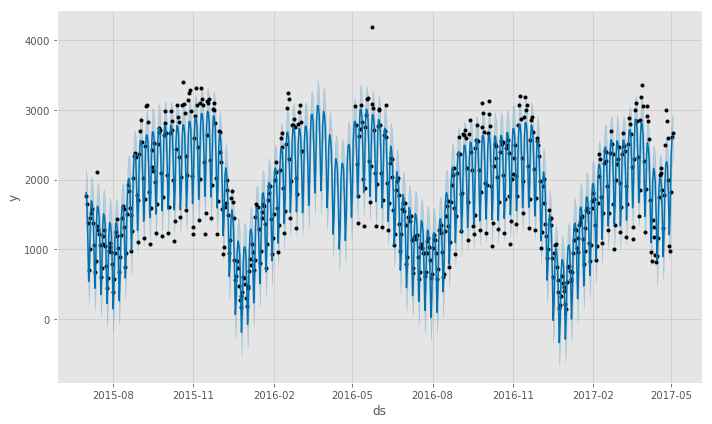

In [111]:
test_model.plot(newf);

In [112]:
train = pd.read_feather('../data/train.f')

In [118]:
testing_df = train.loc[92733].reset_index()
testing_df.columns = ['ds','y']
print(testing_df.shape)
testing_df.head()

(793, 2)


,ds,y
0,2015-07-01,1766.0
1,2015-07-02,1655.0
2,2015-07-03,1373.0
3,2015-07-04,701.0
4,2015-07-05,1000.0


In [119]:
val_lims = (-60,None)

In [121]:
print(testing_df.iloc[val_lims[0]:val_lims[1]].shape)
testing_df.iloc[val_lims[0]:val_lims[1]]

(60, 2)


,ds,y
733,2017-07-03,1396.0
734,2017-07-04,1349.0
735,2017-07-05,1348.0
736,2017-07-06,1298.0
737,2017-07-07,1022.0
738,2017-07-08,642.0
739,2017-07-09,726.0
740,2017-07-10,1132.0
741,2017-07-11,1146.0
742,2017-07-12,1052.0


In [122]:
val_lims_prev_year = utils.prevYear_shift(val_lims)
print(testing_df.iloc[val_lims_prev_year[0]:val_lims_prev_year[1]].shape)
testing_df.iloc[val_lims_prev_year[0]:val_lims_prev_year[1]]

(60, 2)


,ds,y
368,2016-07-03,888.0
369,2016-07-04,1465.0
370,2016-07-05,1462.0
371,2016-07-06,1398.0
372,2016-07-07,1475.0
373,2016-07-08,1138.0
374,2016-07-09,661.0
375,2016-07-10,734.0
376,2016-07-11,1182.0
377,2016-07-12,1187.0


In [123]:
val_lims_prev_prev_year = utils.prevYear_shift(val_lims_prev_year)
print(testing_df.iloc[val_lims_prev_prev_year[0]:val_lims_prev_prev_year[1]].shape)
testing_df.iloc[val_lims_prev_prev_year[0]:val_lims_prev_prev_year[1]]

(60, 2)


,ds,y
3,2015-07-04,701.0
4,2015-07-05,1000.0
5,2015-07-06,1450.0
6,2015-07-07,1525.0
7,2015-07-08,1576.0
8,2015-07-09,1383.0
9,2015-07-10,1058.0
10,2015-07-11,668.0
11,2015-07-12,831.0
12,2015-07-13,1334.0


In [127]:
val_lims = (-120,-60)

In [128]:
print(testing_df.iloc[val_lims[0]:val_lims[1]].shape)
testing_df.iloc[val_lims[0]:val_lims[1]]

(60, 2)


,ds,y
673,2017-05-04,2667.0
674,2017-05-05,1818.0
675,2017-05-06,1359.0
676,2017-05-07,1841.0
677,2017-05-08,2420.0
678,2017-05-09,2426.0
679,2017-05-10,2146.0
680,2017-05-11,2437.0
681,2017-05-12,1898.0
682,2017-05-13,1173.0


In [129]:
val_lims_prev_year = utils.prevYear_shift(val_lims)
print(testing_df.iloc[val_lims_prev_year[0]:val_lims_prev_year[1]].shape)
testing_df.iloc[val_lims_prev_year[0]:val_lims_prev_year[1]]

(60, 2)


,ds,y
308,2016-05-04,3055.0
309,2016-05-05,2779.0
310,2016-05-06,2231.0
311,2016-05-07,1375.0
312,2016-05-08,1759.0
313,2016-05-09,2630.0
314,2016-05-10,2722.0
315,2016-05-11,3078.0
316,2016-05-12,2821.0
317,2016-05-13,2008.0


In [130]:
val_lims_prev_prev_year = utils.prevYear_shift(val_lims_prev_year)
print(testing_df.iloc[val_lims_prev_prev_year[0]:val_lims_prev_prev_year[1]].shape)
testing_df.iloc[val_lims_prev_prev_year[0]:val_lims_prev_prev_year[1]]

(3, 2)


,ds,y
0,2015-07-01,1766.0
1,2015-07-02,1655.0
2,2015-07-03,1373.0
